In [2]:
# Importing the libraries
import pandas as pd
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords
import nltk
from sentence_transformers import SentenceTransformer, models
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
# Importing the dataset
foodfacts = pd.read_csv('/home/apprenant/Documents/Brief-13-FoodFlix-NLP/data/02_intermediate/cleaned_food_data.csv', usecols = ['product_name', 'categories'])
foodfacts['id'] = foodfacts.index
foodfacts.head(10)

,Unnamed: 0,product_name,categories,countries_en,ingredients_text,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,nutrition-score-fr_100g,id
0,7,Pack de 2 Twix,Not specified,France,Not specified,NaN,unknown,1481.0,4.17,0.0000,77.08,0.0,6.2,6.25,0.0000,0.000000,0.0,NaN,0
1,9,Root Beer,"Boissons,Boissons gazeuses,Sodas,Boissons sucr...",France,"Eau gazéifiée, sirop de maïs à haute teneur en...",e,Beverages,215.0,0.00,0.0000,14.20,13.6,0.0,0.00,0.0616,0.024200,0.0,18.0,1
2,11,"Gotta-have grape, seriously strawberry flavor","Snacks sucrés,Confiseries,Bonbons",France,Not specified,d,Sugary snacks,1667.0,0.00,0.0000,93.30,93.3,0.0,0.00,0.0000,0.000000,0.0,14.0,2
3,12,Thé noir aromatisé violette et fleurs,en:beverages,France,Thé noir aromatisé à la fleur de violette et p...,c,Beverages,17.0,0.10,0.1000,0.10,0.1,0.0,0.10,0.0010,0.000394,0.0,2.0,3
4,15,Preparation mug cake chocolat-caramel au beurr...,Not specified,France,"farine de blé (gluten), sucre de canne, pépite...",e,unknown,1632.0,7.00,4.5000,70.00,42.0,0.0,7.00,0.9750,0.383858,0.0,21.0,4
5,16,Mini Confettis,Not specified,France,Not specified,d,Not specified,1753.0,0.00,0.8000,0.00,87.7,0.9,0.60,0.0100,0.003937,0.0,14.0,5
6,17,Praliné Amande Et Noisette,Not specified,France,Not specified,d,Not specified,2406.0,0.00,2.9000,0.00,50.3,3.9,9.50,0.0030,0.001181,0.0,14.0,6
7,21,"Pepsi, Nouveau goût !",Sodas au cola,France,"Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,177.0,0.00,0.0000,10.40,10.4,0.0,0.00,0.0254,0.010000,0.0,13.0,7
8,22,Sauces,Sauces,France,Not specified,d,Fat and sauces,1215.0,23.80,1.8000,18.50,17.0,0.0,1.30,1.7000,0.669291,0.0,14.0,8
9,23,Blle Pet 50CL Coca Cola Cherry,en:beverages,France,eau azéifiée ; sucre : colorant : acidifiant :...,e,Beverages,180.0,0.10,0.0001,10.70,10.7,0.0,0.00,0.0000,0.000000,0.0,14.0,9


Index(['Unnamed: 0', 'product_name', 'categories', 'countries_en',
       'ingredients_text', 'nutrition_grade_fr', 'pnns_groups_1',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'fruits-vegetables-nuts_100g', 'nutrition-score-fr_100g',
       'id'],
      dtype='object')

## Analyse exploratoire des données

In [4]:
foodfacts['product_name'] = foodfacts['product_name'].astype('str')
foodfacts['categories'] = foodfacts['categories'].astype('str')

foodfacts['product_name'] = foodfacts['product_name'].str.replace('\d+', '')
foodfacts['categories'] = foodfacts['categories'].str.replace('\d+', '')

In [5]:
product_name_corpus = ' '.join(foodfacts['product_name'])
categories_corpus = ' '.join(foodfacts['categories'])

In [6]:
final_stopwords_list = stopwords.words('english') + stopwords.words('french')
print(final_stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

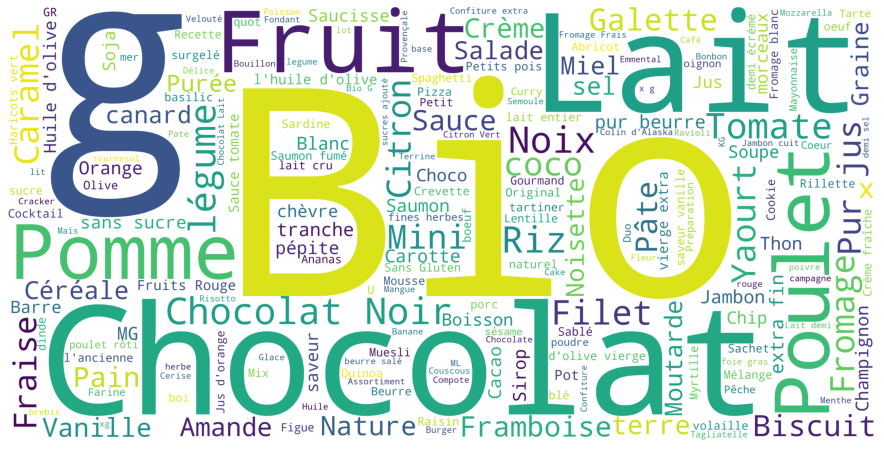

In [7]:
name_wordcloud = WordCloud(stopwords = final_stopwords_list, background_color = 'white', height = 2000, width = 4000).generate(product_name_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

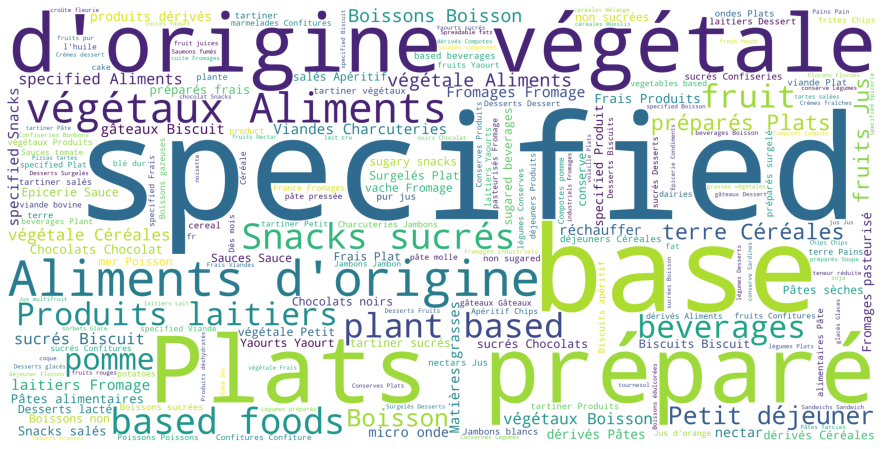

In [8]:
name_wordcloud = WordCloud(stopwords = final_stopwords_list, background_color = 'white', height = 2000, width = 4000).generate(categories_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

In [9]:
foodfacts['content'] = foodfacts[['product_name', 'categories']].astype(str).apply(lambda x: ' // '.join(x), axis = 1)

In [10]:
# Fillna
foodfacts['content'].fillna('Null', inplace = True)

## Train the Recommender

### TF-IDF (Term Frequency - Inverse Document Frequency)


In [11]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), stop_words = final_stopwords_list, min_df = 0)
tfidf_matrix = tf.fit_transform(foodfacts['content'])

In [12]:
tfidf_matrix

<95901x162818 sparse matrix of type '<class 'numpy.float64'>'
	with 1394348 stored elements in Compressed Sparse Row format>

In [13]:
# list_foodfacts = foodfacts['content'].tolist()
# list_foodfacts

In [14]:
# word_embedding_model = models.Transformer('distiluse-base-multilingual-cased-v1')
# pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(), pooling_mode_mean_tokens = True, pooling_mode_max_tokens = False)
# model = SentenceTransformer('distiluse-base-multilingual-cased-v1')


In [15]:
# user_input = input("Veuillez entrer le nom d'un produit : ")
# print("Nom du produit entré : ", user_input)
# input_embedding = model.encode(user_input)

# sentences = list_foodfacts
# sentence_embeddings = model.encode(sentences)

In [16]:
print(tfidf_matrix)

  (0, 152902)	0.5413093858347978
  (0, 107250)	0.5969954216383255
  (0, 140146)	0.10425473796981446
  (0, 152889)	0.4491005845522504
  (0, 107197)	0.3715107399735629
  (1, 128239)	0.29423214604073444
  (1, 142645)	0.3047224679072837
  (1, 16702)	0.15414343654679002
  (1, 138269)	0.1874536163476787
  (1, 66732)	0.18481128966162125
  (1, 16655)	0.1594506681532237
  (1, 16619)	0.12584806254203704
  (1, 10882)	0.2810159034989558
  (1, 128238)	0.29423214604073444
  (1, 10904)	0.20681671357719295
  (1, 142587)	0.1313749440941188
  (1, 138262)	0.15103647338556306
  (1, 66725)	0.15776324075166387
  (1, 16610)	0.2538532313467614
  (1, 10875)	0.22787096281410718
  (1, 128237)	0.5446211741679585
  (2, 35864)	0.17469811105470648
  (2, 142693)	0.15619750346095457
  (2, 138071)	0.10956915506080844
  (2, 57833)	0.32089771798703354
  :	:
  (95898, 101155)	0.43377275412322824
  (95898, 33229)	0.4082446489689972
  (95898, 35301)	0.273793568333249
  (95898, 140146)	0.07575077325627974
  (95899, 13812)	0.

In [17]:
print(list(tf.vocabulary_.keys())[list(tf.vocabulary_.values()).index(64754)])

frühstücksmüsli specified


## Cosine similarity

In [18]:
user_input = input("Veuillez entrer le nom d'un produit : ")
print("Nom du produit entré : ")

Nom du produit entré : 


In [19]:
user_matrix = tf.transform([user_input])
user_matrix

<1x162818 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [20]:
cosine_similarities = linear_kernel(user_matrix, tfidf_matrix)

In [21]:
# len(cosine_similarities[0])

In [22]:
results = {}
similar_indices = cosine_similarities[0].argsort()[:-10:-1]
similar_items = [(cosine_similarities[0][i], foodfacts['id'][i]) for i in similar_indices]
results = similar_items[1:]

In [23]:
# print(results)

In [24]:
for i in range(10):
    print(foodfacts.iloc[results[i][1]])

product_name                     Pâte à Pizza
categories                      Pâtes à pizza
id                                      50375
content         Pâte à Pizza // Pâtes à pizza
Name: 50375, dtype: object
product_name                     Pâte à Pizza
categories                      Pâtes à pizza
id                                      38244
content         Pâte à Pizza // Pâtes à pizza
Name: 38244, dtype: object
product_name                     Pâte à pizza
categories                      Pâtes à pizza
id                                      20409
content         Pâte à pizza // Pâtes à pizza
Name: 20409, dtype: object
product_name                     Pâte à pizza
categories                      Pâtes à pizza
id                                      31502
content         Pâte à pizza // Pâtes à pizza
Name: 31502, dtype: object
product_name                     It's Pizza
categories                    Not specified
id                                    89566
content         It's Piz

IndexError: list index out of range